#Objective
Fetching insights from the behavior of a common Uber customer.

#Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os

#Loading Dataset

In [17]:
df = pd.read_csv('my_uber_drives.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [18]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [19]:
print(df.shape)
df.dtypes

(1156, 7)


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

#Checking for Redundancy and Inconsistency

In [20]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [21]:
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#Dropping Null

In [22]:
df.drop(df[df['END_DATE*'].isna()].index, axis = 0, inplace = True)

In [23]:
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


#Dropping Purpose Column
Purpose has more than 50% null  values


In [25]:
df.drop(['PURPOSE*'], axis = 1, inplace = True)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7


#Duplicate Records

In [26]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


#Removing Duplicate

In [27]:
df.drop(df[df.duplicated()].index, axis = 0, inplace = True)
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


#Converting Date to desired format

In [29]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = '%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

#EDA

#Univariate

#category

In [30]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [31]:
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles = ('MILES*', 'sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Miles Traveled per Category')

<Figure size 640x480 with 0 Axes>

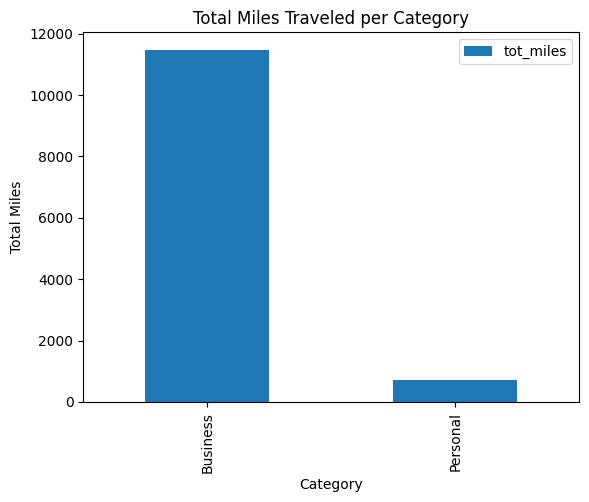

In [32]:
plt.figure()
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles = ('MILES*', 'sum')).plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total Miles Traveled per Category')

Inference: User mainly uses Uber for business trips.

#Unique Starting Points

In [33]:
len(df['START*'].unique())

177

# Top 10 starting points

In [35]:
df['START*'].value_counts(ascending = False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

<Axes: title={'center': 'Top 10 Pickup Spots'}, xlabel='Pickup Count', ylabel='Places'>

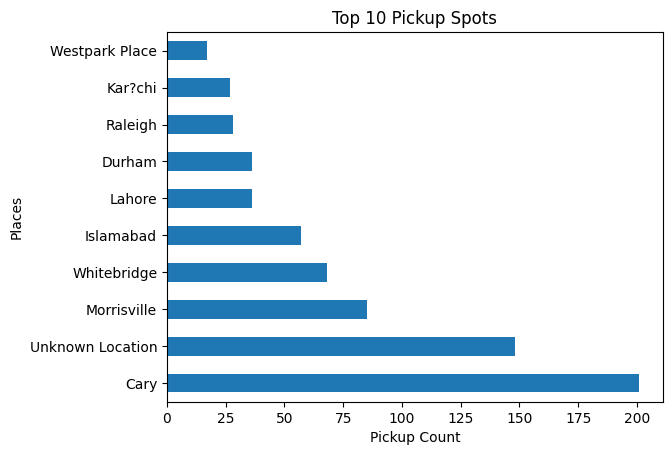

In [40]:
df['START*'].value_counts(ascending = False)[:10].plot(kind = 'barh', ylabel = 'Places', xlabel = 'Pickup Count', title = 'Top 10 Pickup Spots')

#Unique Stops

In [41]:
len(df['STOP*'].unique())

188

In [42]:
df['STOP*'].value_counts(ascending = False)[:10]

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP*, dtype: int64

<Axes: title={'center': 'Top 10 Drop Locations'}, xlabel='Drop Location', ylabel='Places'>

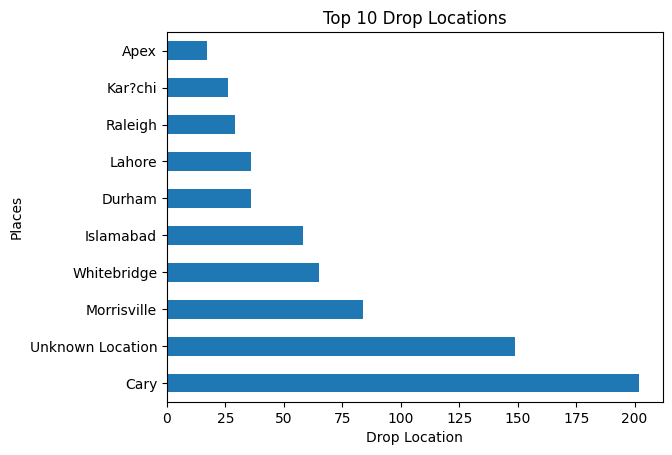

In [43]:
df['STOP*'].value_counts(ascending = False)[:10].plot(kind = 'barh', ylabel = 'Places', xlabel = 'Drop Location', title = 'Top 10 Drop Locations')

#Unknown Starting & Drop-off Locations

In [46]:
print(df[df['START*'] == 'Unknown Location']['START*'].value_counts())
df[df['STOP*'] == 'Unknown Location']['STOP*'].value_counts()

Unknown Location    148
Name: START*, dtype: int64


Unknown Location    149
Name: STOP*, dtype: int64

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


#Multivariate

In [51]:
df.groupby(['START*', 'STOP*'])['MILES*'].sum().sort_values(ascending = False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

#One Way vs Round Trip

<Axes: xlabel='ROUND_TRIP*', ylabel='count'>

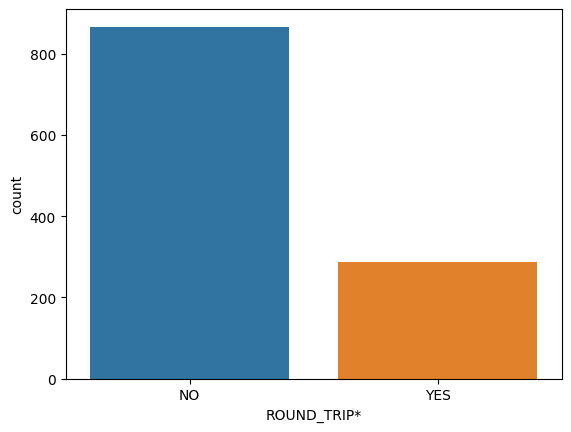

In [56]:
def is_roundtrip(df):
  if df['START*'] == df['STOP*']:
    return 'YES'
  else:
    return 'NO'

df['ROUND_TRIP*'] = df.apply(is_roundtrip, axis = 1)
sns.countplot(x = 'ROUND_TRIP*', data = df, order = df['ROUND_TRIP*'].value_counts().index)

In [57]:
df['ROUND_TRIP*'].value_counts()

NO     866
YES    288
Name: ROUND_TRIP*, dtype: int64